# ETL, Analysis, and Visualization

**Vladyslav Honcharuk**

# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. Extract-Transform-Load](#2.-Extract-Transform-Load)
    - [2.1 The ETL Process](#2.1-The-ETL-Process)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Read the Data Using Python](#2.4-Reading-the-Data-Using-Python)
         - [2.4.1 Reading Sample Data](#2.4.1-Reading-Sample-Data)
         - [2.4.2 Reading the MRST Data](#2.4.2-Reading-the-MRST-Data)
    - [2.5 Writing an Installation Script](#2.5-Writing-an-Installation-Script)
- [3. Analysis and Visualization](#3.-Project-Description)
    - [3.1 Running Queries in MySQL Workbech](#3.1-Running-Queries-in-MySQL-Workbech)
    - [3.2 Running Queries From Python](#3.2-Running-Queries-From-Python)
    - [3.3 Explore Trends](#3.3-Explore-Trends)
    - [3.4 Explore Percentage Change](#3.4-Explore-Percentage-Change)
    - [3.5 Explore Rolling Time Windows](#3.5-Explore-Rolling-Time-Windows)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

The US economy is the largest in the world and the most interesting to discover, there are a lot of different kinds of businesses and each of them contributes to the whole. Analyzing the business and applying the possible actions is a great way to increase the interest from investors and make bigger profit. But each of the businesses is different and requires a separate analysis, from the quality of this analysis depends the future state of the business.
To perform the analysis the complete and clear data which is stored in some database is needed. All of this handles ETL, an important technic, which is the first thing that is needed to be done before analyzing the data. 
There is a lot of indicators which may be helpfull when making a good decision, such as trends, seasonalities, percentage change etc. 
In my analysis of some of the businesses I was able to define the sectors of economy that become more profitable since 1982, and the ones that may seize to exist soon, also I described seasonalities of some of the businesses, which are patterns at a certain period of the year.
The grocery stores are the most profitable business from all of the analyzed, book stores - are the least profitable.

[Back to top](#Index)


## 1. Introduction

In the project I need to perform 2 main things - ETL (Extract-Transform-Load) process on the dataset and analysis of the cleaned data. ETL is a powerful tool to clean the data from the redundant parts, impute the missing values, or add additional data, encrypt the data and finally upload the data into the database on the server to make it available for multiple to people to work with or store the data remotely.

Analysis of the data is used to make prediction of the future state of the subject. In this project the data from the sales of different kinds of businesses from the USA is used. To take more insights from the data there is things such as trends which defines whether the values of a time series increase, decrease or stay the same over certain period of time, percentage change which defines how the value has changed over certain period of time and rolling time windows, which allow to upply some functions on a subset of values from the whole set of data, such as a moving average n function which takes each n values from the time series and computes their mean, and then the new set of data is created after that.

The task is to perform the whole process of ETL - open the file and transform it in the one, that will satisfy the requiremens that the dataset need to follow to be able to perform an analysis with it, and upload the file into database in MySQL Server locally. Then with the help of MySQL write differnt queries in the Python IDE to extract the needed information to complete the final step - build grapths that will visualy represent the patterns, trends and seasonalities of the data of certain businesses. And finaly, make an explanation for each graph.

[Back to top](#Index)

## 2. Extract-Transform-Load

[Back to top](#Index)

### 2.1 The ETL Process

To perform ETL 3 things have to be done - Extraction of data, Transformation and Loading. It is a process which involves extracting the data from the sources, where it is stored, transforming it with different cleaning procedures so it is ready for future analysis and storing the data in the database.

As companies want to take some insights from their data - large amounts of it have to be collected, but to ease the life of the people who will be using this data to conduct some analysis or run some ML models, it has to be stored in one place, has to be clean and well-structured, because data scientists will not be able to create ML models if the data will be full of redundant information and they will have to waste a lot of time to transform this data into something valuable, which is the waste of money for the company. It's better to do ETL in advance.

Key steps of ETL are:

**Extract**: retrieve data from unstructured data pool, and then conduct some cleaning  from the unnecessary information.

**Transform**: transform data by imputing or deleting missing values, transforming categorical values into numerical, converting dates from string format into date formats to make it possible to draw insights from the data by analyzing time periods, normalize the data if it will be helpful when building ML models etc.

**Load**: the data has to have a structure which can be used to create a database from it. The database should be user-friendly and be easy to use for analysis in the future.

Python is the kind of a language after using which for data manipulation you will not consider switching to the other languages, because with Python you can do anything that involves ETL, thanks to the variety of APIs and libraries you can extract, transform and load in one place. ETL is not a process which you want to complete as fast as possible, the process of determining the redundant data takes longer than the process of removing that data, but for large databases some additional manipulations should be considered, like transforming data types into ones that take less space, as the process of future analysis of the data can take a lot of time, so the additional procedures have to be held depending on the size of the data.

[Back to top](#Index)

### 2.2 Data Exploration

The Monthly Retail Trade Survey (MRTS) is a survey from a group of surveys conducted by the U.S. Census Bureau which provides comprehensive data on U.S. retail economic activity. The survey is conducted monthly since 1951, but I will be using a sample of the whole dataset of sales estimates from 1992 to early 2021. The purpose of the survey is to provide current estimates of sales at retail and food services stores and inventories held by retail stores. 
Companies with one or more establishments that sell merchandise and related services to the final consumers provide data on dollar value of retail sales and end-of-month inventories, this data is stored in the database.
This survey and produced dataset are very important for the analysis. Data from the survey is widely used throughout government, academic, and business communities. The Bureau of Economic Analysis uses the estimates to calculate Gross Domestic Product. The Bureau of Labor Statistics uses the estimates to develop consumer price indexes and productivity measurements. The Council of Economic Advisers uses the estimates to analyze current economic activity. There are also many other applications of the data in different analyses.



Below is how the data looks like:
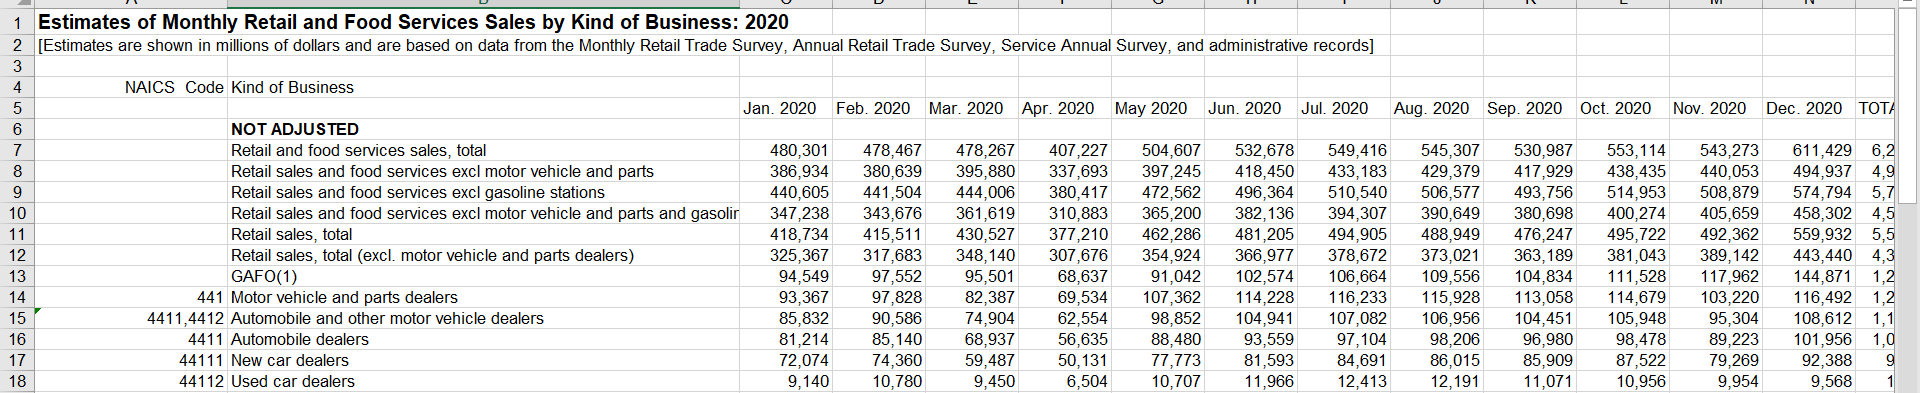

[Back to top](#Index)

### 2.3 Data Preparation

My preparation of the data consists of following steps which I conducted:
- I dropped unnecessary columns: NAICS  Code as it doesn't give any necessary information for analysis and TOTAL which is a bad practice to leave in the database.
- Renamed the column "Unnamed: 1" to 'Kind of Business'
- Transposed the dataframe to convert all the the columns with values per month into one colunt for easier analysis
- Replaced "(S)" and "(NA)" with 0
- Removed rows with missing values (NaN)
- Renamed a column that was created after transposing from "variable" to "period" and casted the type of the column to the datetime64[ns]
- Concatenated all the transformed sheets (not including 2021 as it doesn't contain information for the full year) and received one dataframe, saved it as a .csv file

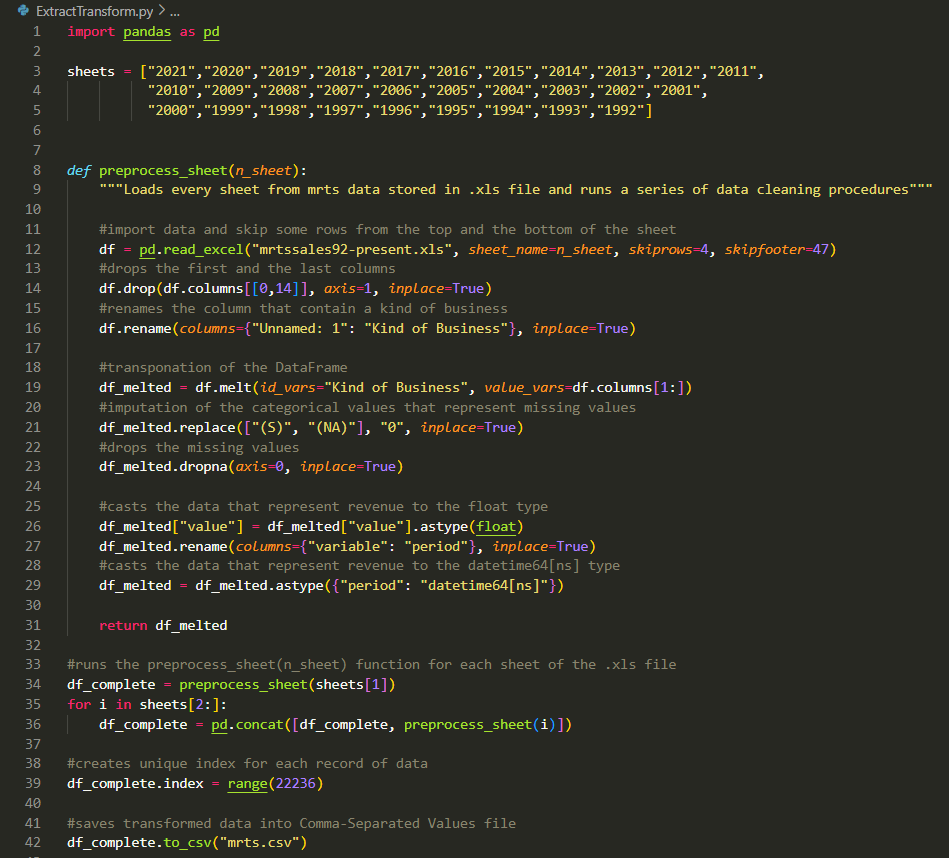

After preparation the data is stored like that, and doesn't include any redundant information.

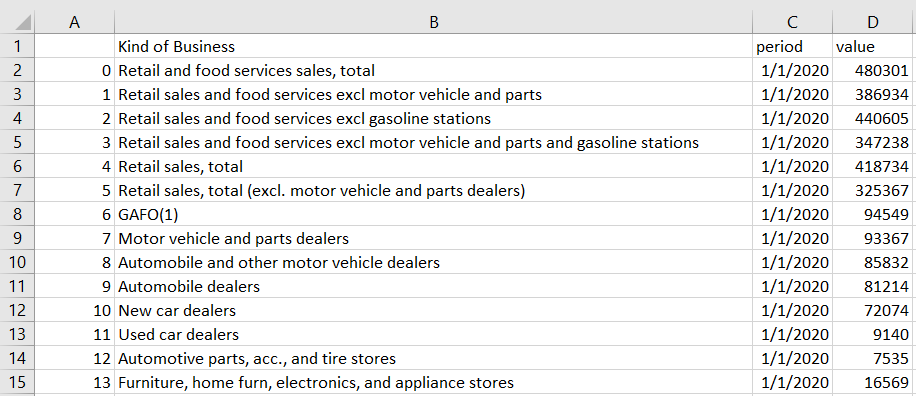

I decided to leave an ID in case if it will come in handy in the future analysis

[Back to top](#Index)

### 2.4 Read the Data Using Python

[Back to top](#Index)

### 2.4.1 Reading Sample Data

Describe the sample dataset that you have defined to test your Python script to read CSV files and explain how you used Python to read it.

I decided to use a sample from the Drinks dataset which contain some information about beverage consumption by countries and which I used earlier to perform some analysis. To read the CSV file the first thing that must be done is opening the CSV file, then it should be read with the help of csv library with specified delimeter and stored in some variable, and then printed rowwise into the output stream.

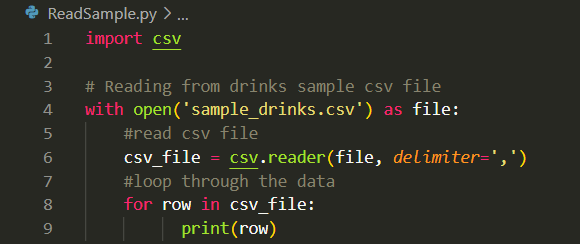

This is an output from the console when I have run the program:

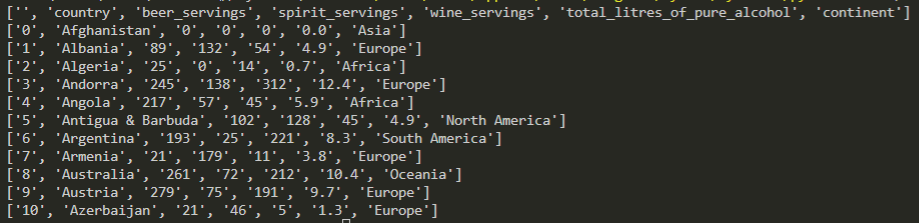

[Back to top](#Index)

### 2.4.2 Reading the MRTS Data

The process is the same as reading the sample above. To read the CSV file the first thing that must be done is opening the CSV file, then it should be read with the help of csv library with specified delimeter and stored in some variable, and then printed rowwise into the output stream.

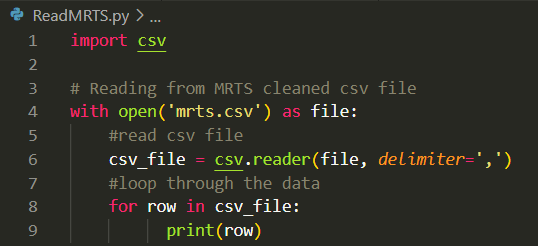

Below is a fraction of the output of the above program:

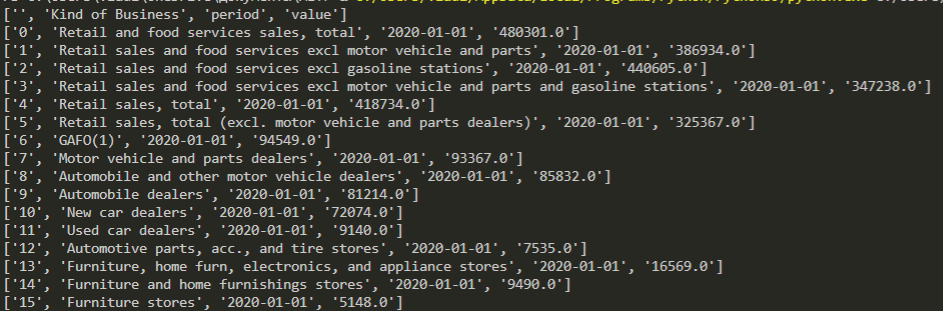

[Back to top](#Index)

### 2.5 Writing an Installation Script

I created 3 scripts that involves connecting to the MySQL Server.

The first script involves connecting to MySQL Server using yaml file, which is a good practice to use when you want to secure personal information. After connecting to the server I create a database which will be used to store a table with contence from the file with transformed MRTS data.

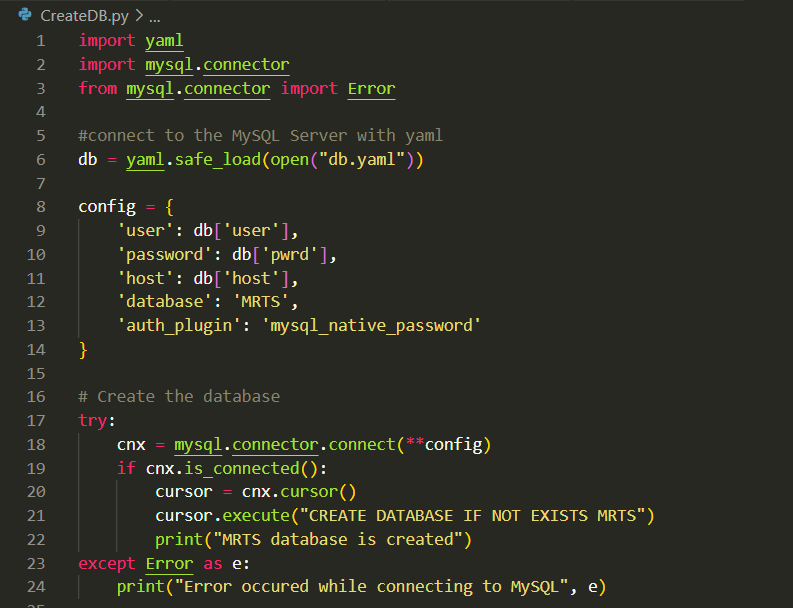

After running the script the message of successful creation of a database is displayed:



The next script is used to create a schema for the table which will store the data from MRTS, also the data from the file is inserted in the table in this script.

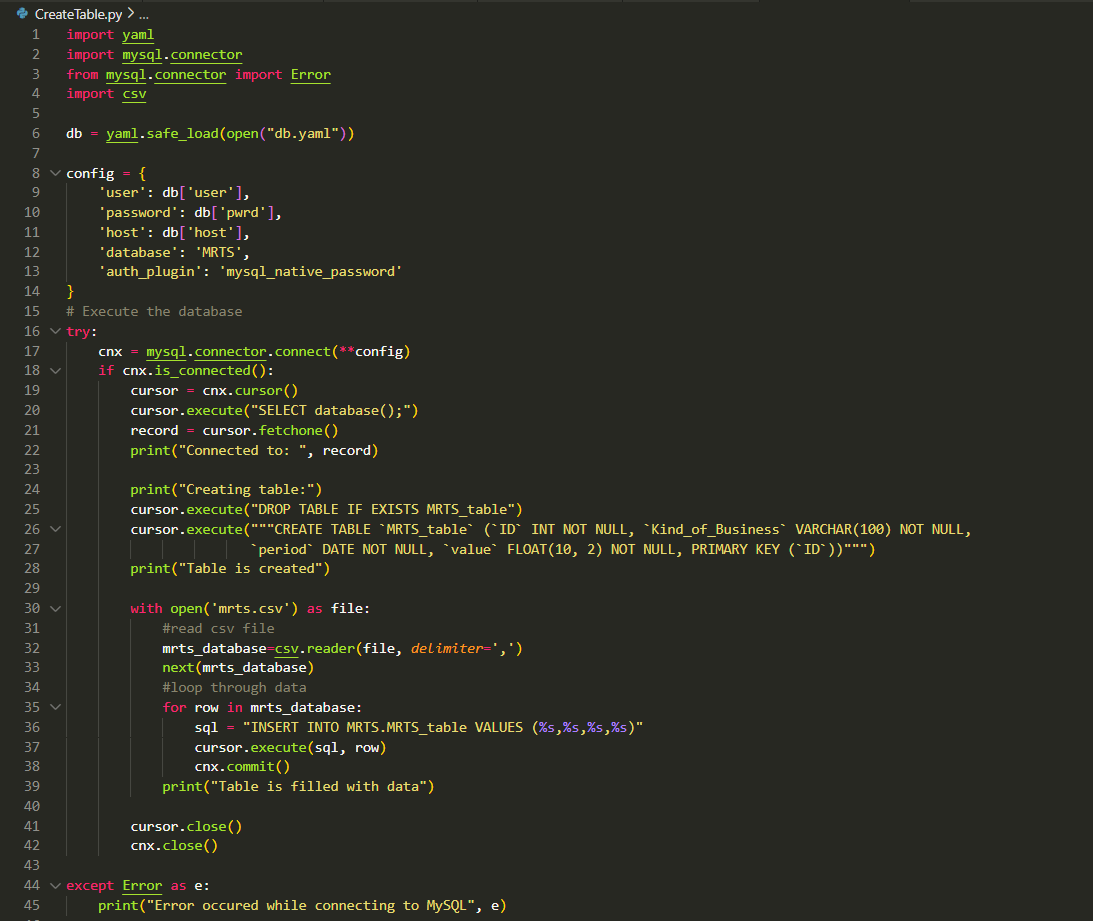


After running the script the message of successful creation of a table, and successful filling of the data is displayed:

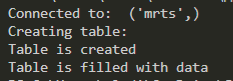

The final script is used to print the data that is stored in the table on the MySQL Server into the output stream.

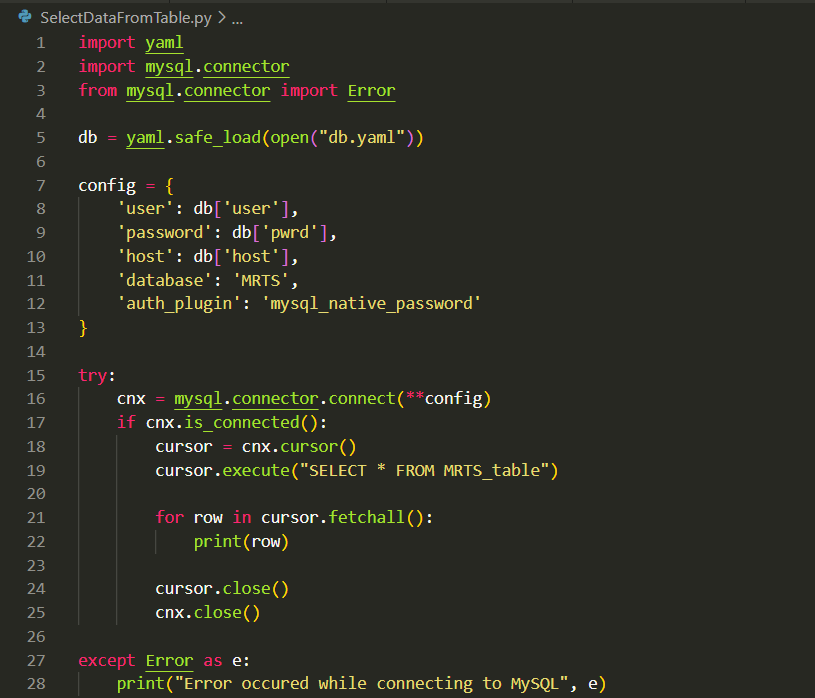

After running the script the contence of the CSV file is outputed into the console|:

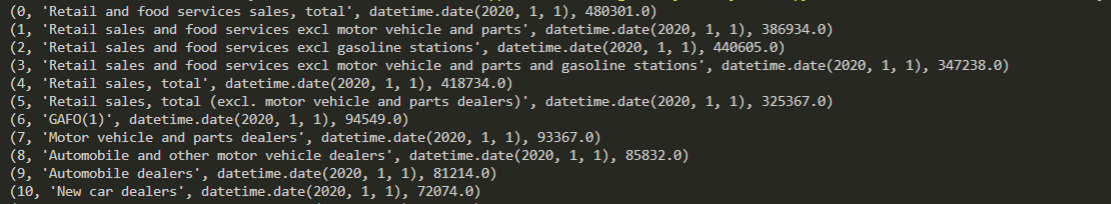


[Back to top](#Index)

## 3. Analysis and Visualization


Running queries using MySQL Workbench or a Python environment doesn't seem much different. You open the environment, write a query and wait until the program process it. But there is some features, disadvantages and advantages of using either of the environments.

MySQL is more user-friendly and more oriented on the graphical user interface. Everything is clear after setting-up the environment, you have a sheet to write you queries in, output section for checking wheter your query worked correctly after running it and and result grid section where the result of the query is displayed in a form of a table. Also MySQL Workbench offers a Reverse Engineer function to look at the interconnections between the tables of the database. Moreover, with Workbench you can execute single queries from the list of multiple.

Python Environment such as Visual Studio Code in turn requires users to be more experienced, to know how to use therminal. You cannot write a query straight ahead after running the IDE, first you need to download driver so you can connect to the MYSQL Server, than you need to connect that driver to your code editor, set up the connection by specifying the properties of the server and host information such as name and password. Then you can only write queries, but for that you have to manualy connect to the server and use a specific variable to refer to to execure queries. This is more complex than writing a query and executing it with one button in Workbench. The output of the query is not as sophisticated as in Workbench, you get a result in a terminal, though I think with the help of external libraries there is a possibility to output the result of the query in a form of a table.

Though writing queries in Python IDE is harder for a beginner, the amount of things you can possibly run in python is a lot bigger. Of course there is a possibility to save the result of the SQL query in Workbench to CSV file and then open this file in Python if you want to explore further your data, but in Python you don't need to save the result of the query to do so, after you get the result you can draw some plots or analyse the data right away.

[Back to top](#Index)

### 3.1 Running Queries in MySQL Workbech

I decided to make 3 different queries to see the difference between running queries in the MySQL Workbench and Python Environment.

The first query is designed to find the total revenue(sum of revenues of each month) for each year for the Electronic stores.

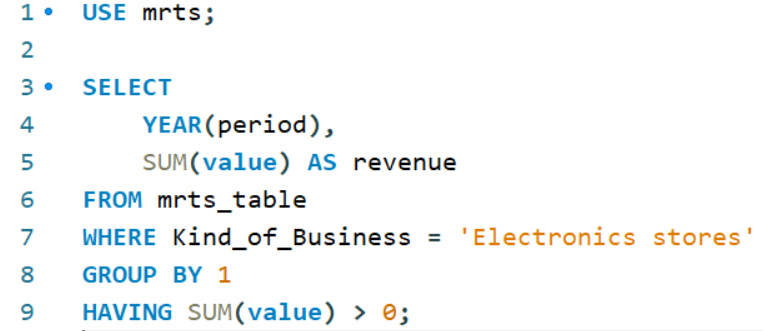

Below is the output of the query:
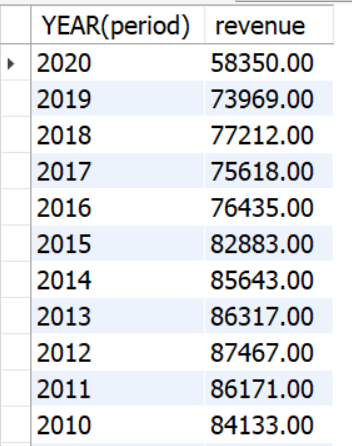

The second query is made to discover the kinds of businesses that produced the highest yearly revenue from all years and the amount of the revenue:
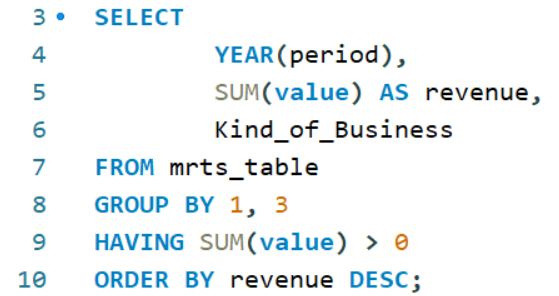

Below is the output of the query:
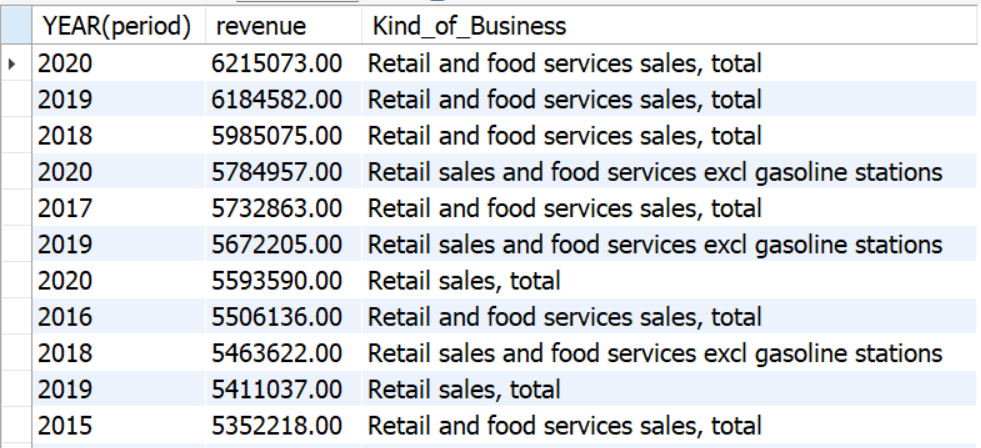

The third query was made to find the total revenue from all kinds of businesses for each year:
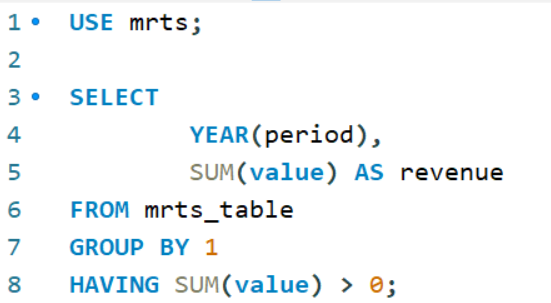

Below is the output of the query:
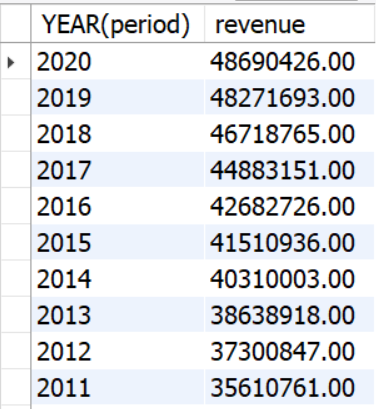



[Back to top](#Index)

### 3.2 Running Queries From Python

Now, I will test running the same queries in the Python environment, the first difference is that I should connect the server every time I make a program with a new query, in MySQL Workbench I connect to the server only once, when I open my environment and set up the connection.

The huge advantage of Python compared to MySQL Workbench is that I can use other functionalities of the language and not only write SQL queries. Below I wrote the same 3 queries and recieved the result in the terminal, but additionaly I plotted a plot for 2 of the queries to show the trend of the time series.

First query:
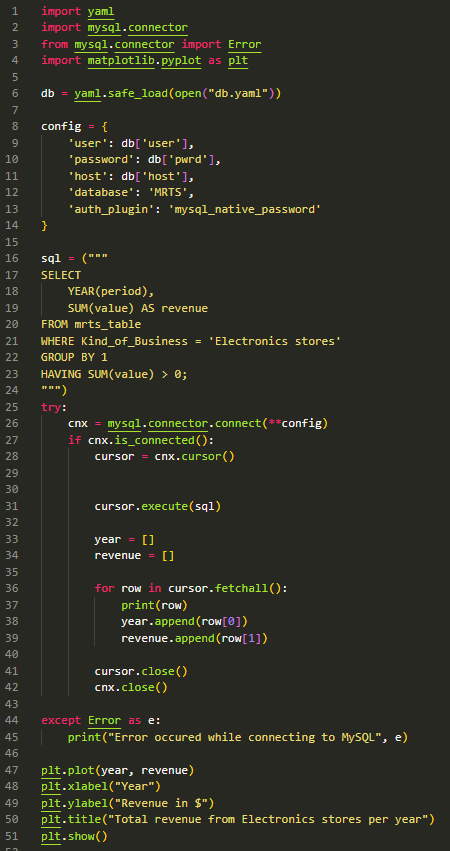

Output of the program execution:
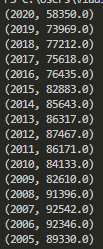

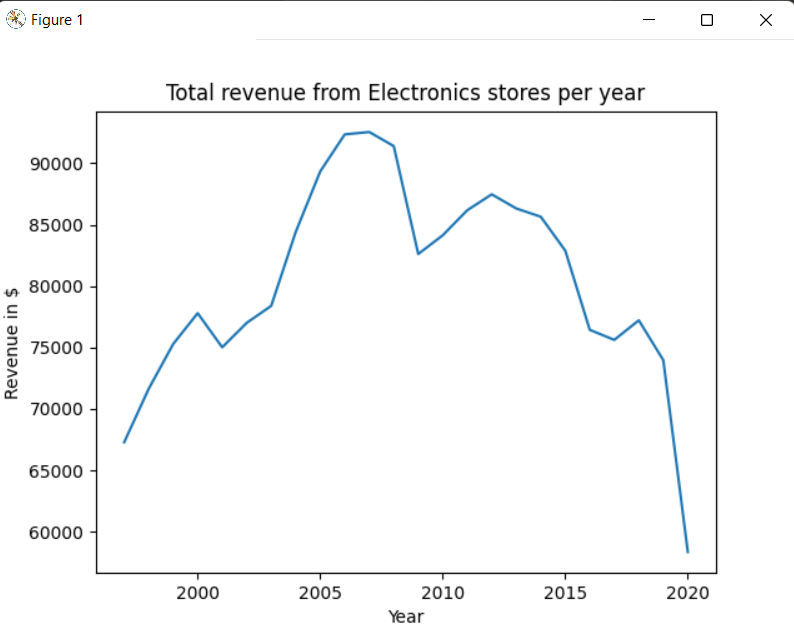

It seems that after the worldwide crysis in 2008 the yearly revenue from Electronic stores became decreasing, I am not sure why it is decreasing, as around that time the first smartphone was invented and after that our world became 10 times more technological, maybe because Electronic stores offer some low-tech goods, which are not that popular now, as we have everything we need in our phones.

Second query:
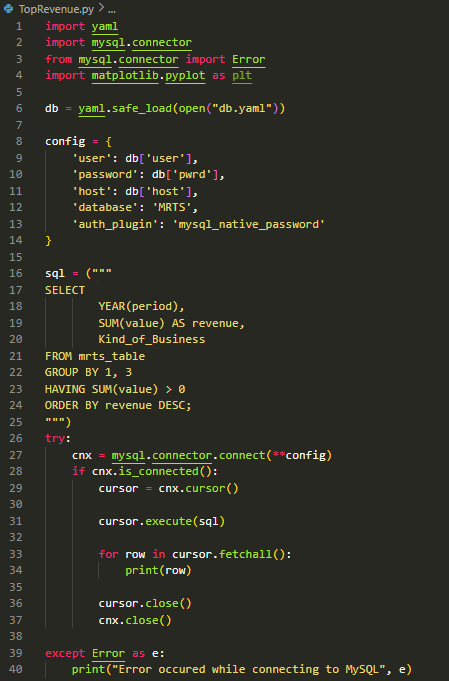

Output of the program execution:
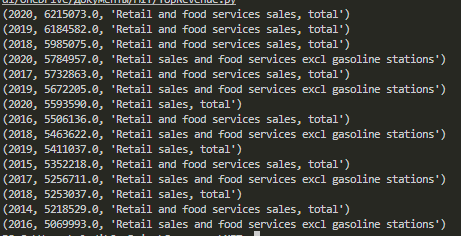

Third query:
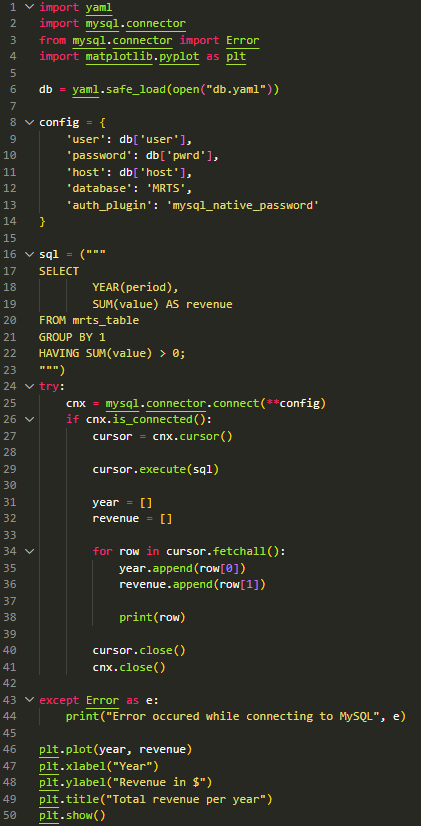

Output of the program execution:
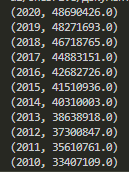

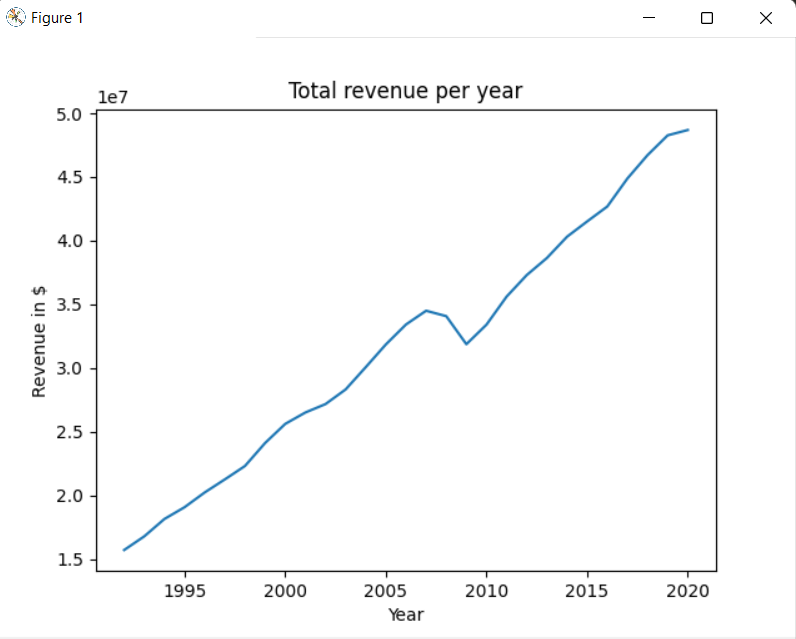

This plot represents yearly revenue for all businesses, the same as in the previous plot there is a clear indication of the crysis as the revenue decreased, but the overall trend is uptrend.

[Back to top](#Index)

### 3.3 Explore Trends


Economic trend is an indicator that shows how a region or a country is doing financially. That is what is a pattern of all the the financial transactions betweeen the companies and consumers. The trend could be:

* uptrend: if the pattern of all the recorded amount of money over certain period of time increases
* downtrend: the opposite of uptrend
* stationary: that is when the trend stays the same and doesn't have any slope.

When you have a trend than you can accurately predict what a certain quantity will be like in the near future, if it decreases for a 5 or 10 years straight without any increasing patterns than it's unlikely to decrease. For example the price of Bitcoin in a yearly timeframe decreases and you may think that it's a bad active to put your money in, but in a 10-years timeframe the price of Bitcoin has an extreme uptrend.

Below is the trend of the monthy retail and food services sales. This is an uptrend, but it can be displayed more clearly if removing a seasonality and plotting a year-wise plot.

Month-wise plot:
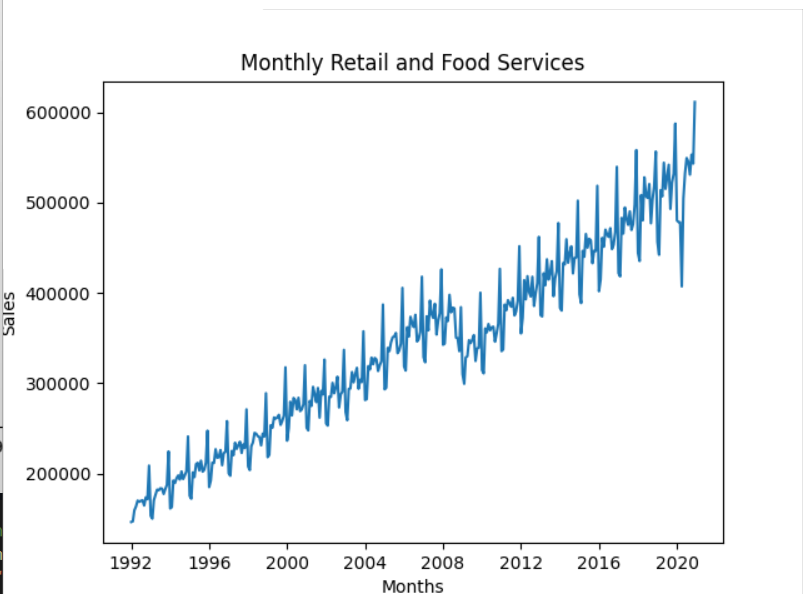

Year-wise plot:
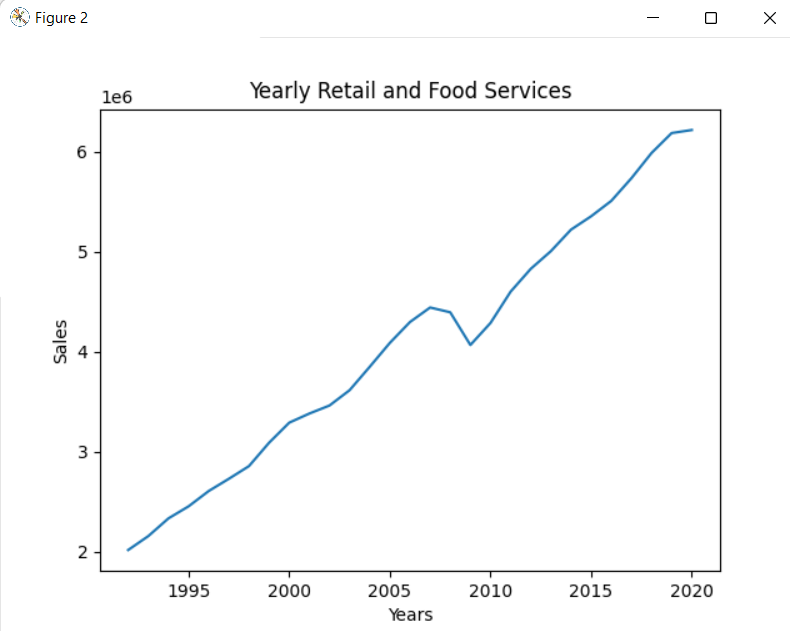

Function to run queries and draw plots:
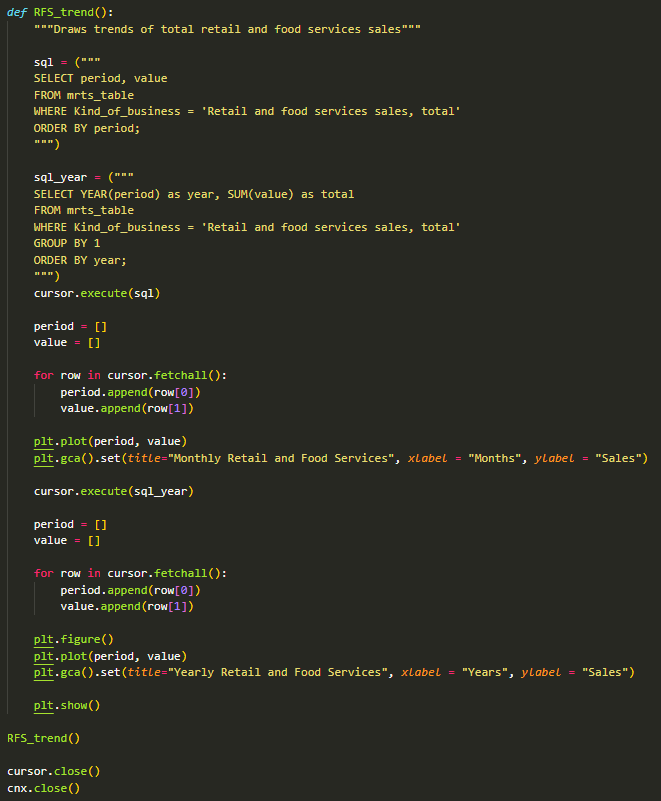

- When comparing businesses like bookstores, sporting goods stores, and hobbies, toys, and games stores, what is the highest trend of all of these options? Which one grew faster? Which one is higher? Is there a seasonal pattern? Were there any changes in 2020? Which is better, monthly or yearly? 

Between Book stores, Sporting goods stores and Hobby, toy, and game stores, obviously, the highest trend has the sporting goods stores, it has also grew faster and has the highest sales throughout almost 3 decades. 
There is a seasonal pattern in all the sales of businesses, they significantly increase in the December of each year, then first 8 months of the year the sales increase and after that they become to significantly decrease untill the December, when they repeat the cycle.

In 2020 the pandemic emerged and many restrictions were put under the companies, economic has greatly suffered. Therefore there is no seasonality pattern in 2020s sales, the first half of the year the restrictions were the most severe and sales decreased in a half, but after some of the restrictions were waived the sales increased, but there is no clear trend in 2020th sales, they increase or decrease inconsiquently.

I have built 2 different graphs with month-wise scale and year-wise and personaly I like the first one, as it contains much more information, such as seasonality. The second is useful when you want to display the clear trend for other people, or see it for yourself, or if you are not interested in seasonal patterns. But for predictions algorithms it's better to have information for each month.

Month-wise:
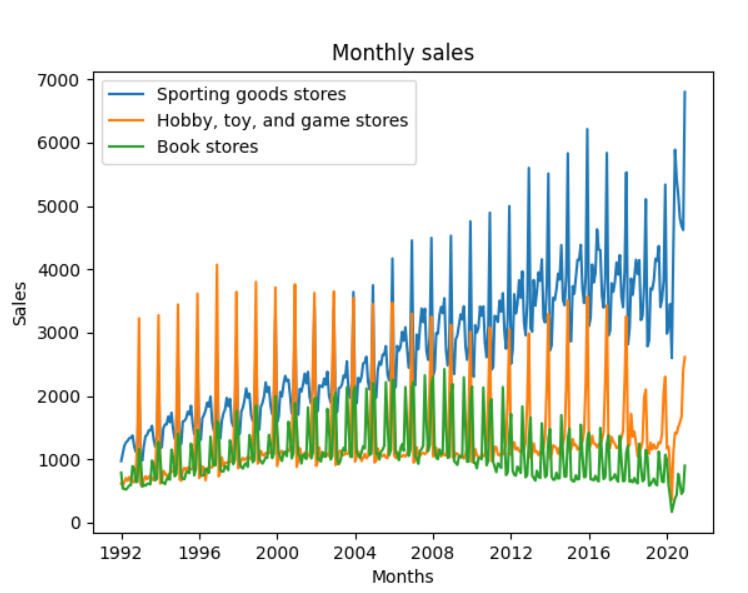

Year-wise:
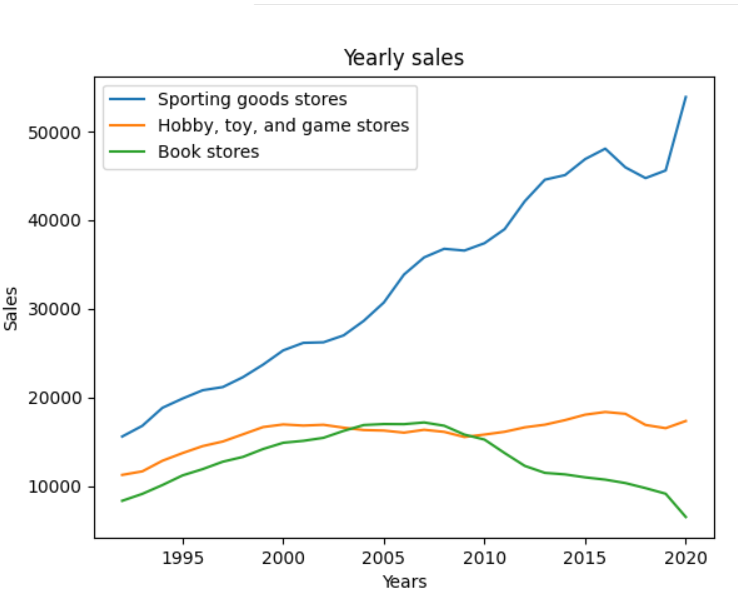

Function that plots the graphs:
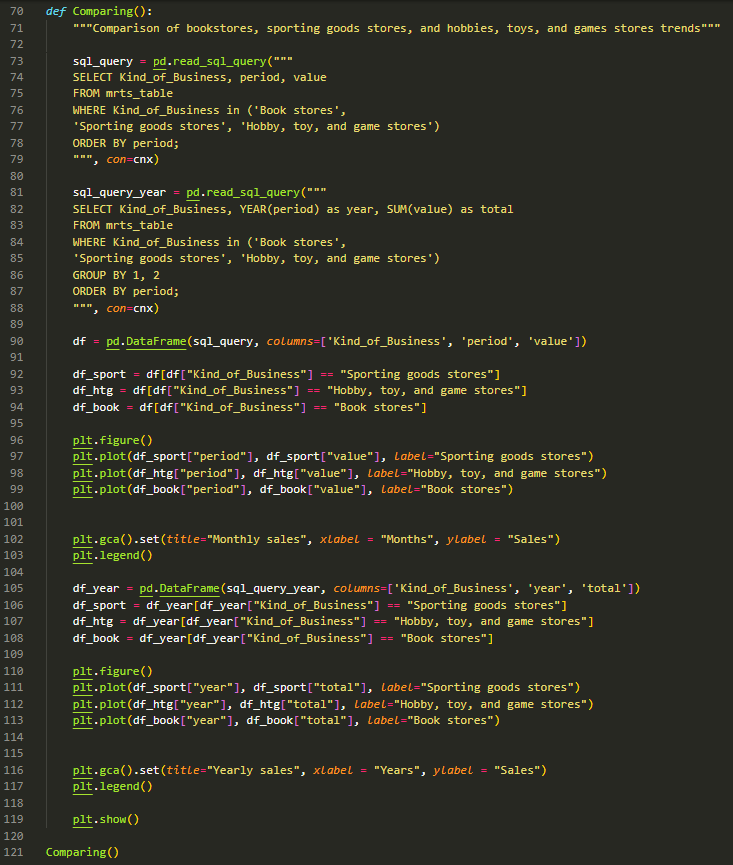

[Back to top](#Index)

### 3.4 Explore Percentage Change

- Consider the women's clothing and men's clothing businesses and their percentage change. How are these two businesses related? For each of the two businesses, what is the percentage of contribution to the whole and how does it change over time?

Percentage change is a change of the price of something over certain period of time represented in percents. It is important because if you have the percentage changes over certain period of time in the past you can use this information to predict the future price by estimating the percentage change between known moment in time and moment in the future. For example if a stock price decreases every summer by a certain amount and increases in winter you can predict by what percentage the price may decrease the next summer.

The next object of analysis is clothing. In the database there is Clothing business and it's divided into subbusinesses such as woman's and men's clothing, as there is almost even number of woman and men population and both need closes some may assume that they patterns and graphs are the same. Indeed, the percentage change of clothing stores sales is almost the same, but men's clothes tend to give bigger revenue at the same time when the sales of woman's closes also increases, it looks like men tend to buy closes more rarely and they buy all their closes at the same time, unlike woman, who buy their clothes more frequently, as there is smaller percentage change. 

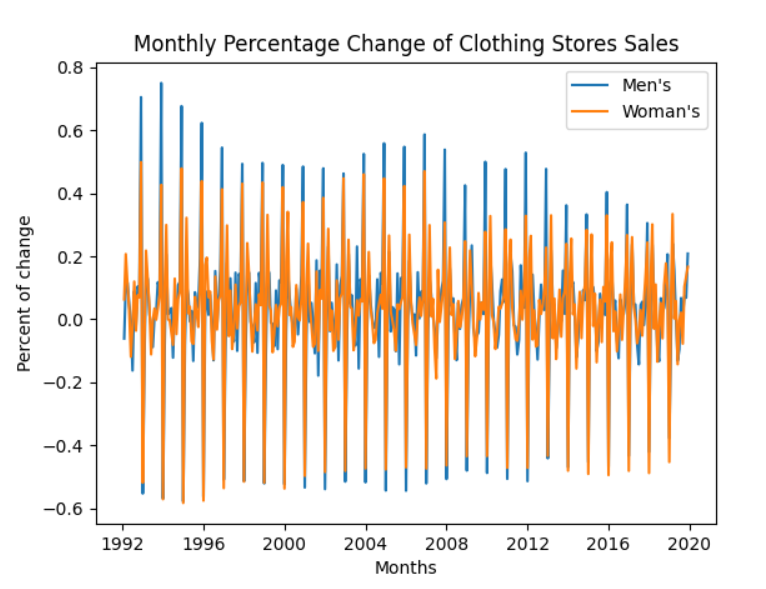

There is also a clear downtrend of contribution of woman's and men's clothing to all clothing sales. The men's clothing decreased from 15% to 5% and woman's from 40% to 20%, which is realy a big change. On the other hand shoe sales and family stores sales increased.

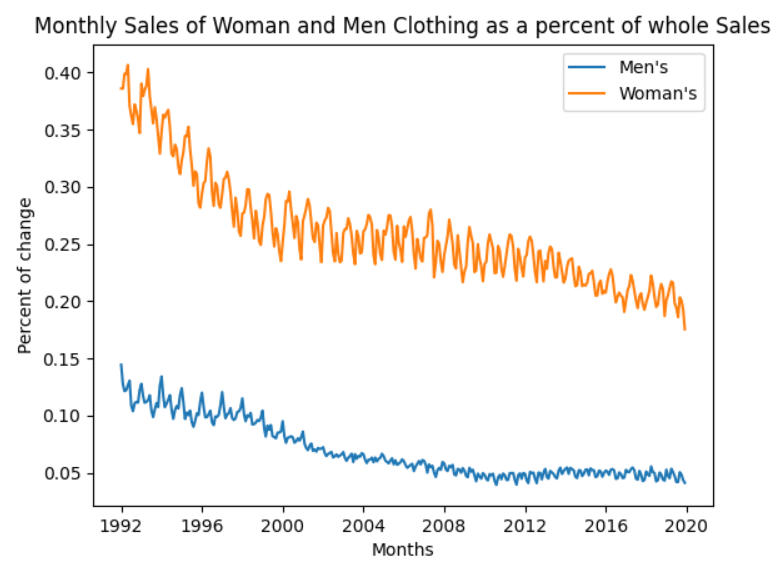

Program code of the above graphs:

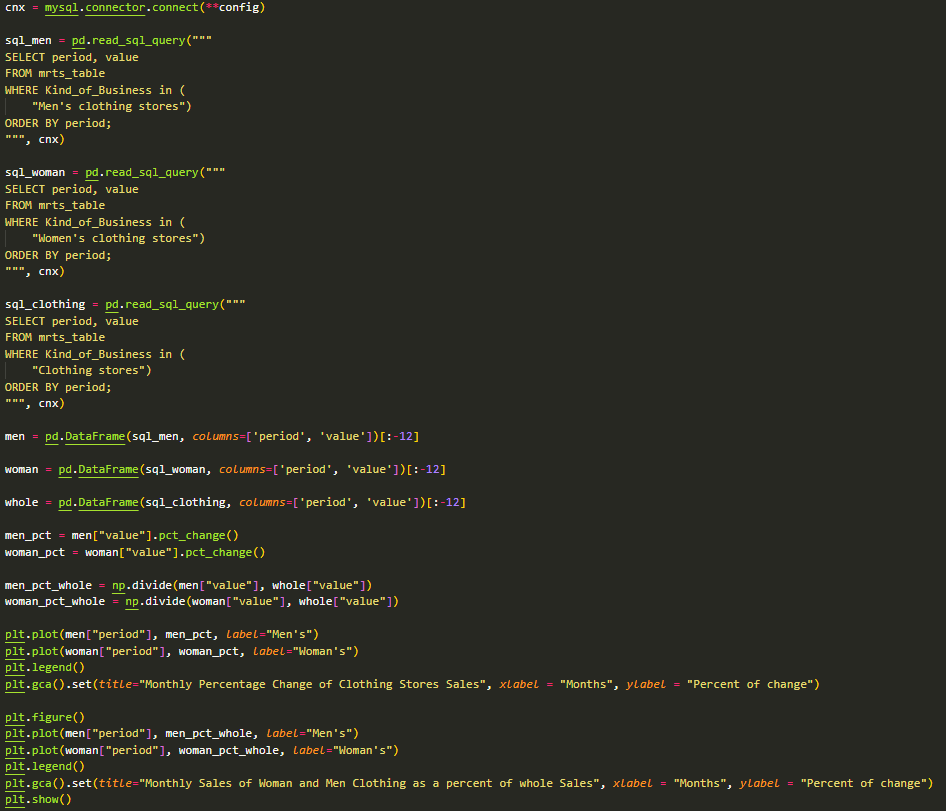

[Back to top](#Index)

### 3.5 Explore Rolling Time Windows

Rolling time window is a technic that allows you to perform a certain operation on a subset of your data. One example could be determining the price of the stock over 3 month period, if you have an information about the price for a period of 10 years then by computing the mean of each 3 month starting from the last. After the computations you will have an average price of a stock over past 3 month which can smooth your trend so you have a clearer trend.

I decided to analyze 2 businesses: book stores and grocery stores. I like to read books, so it was interesting for me to see the result. And I almost guessed the trend of the book stores, the sales rise till the 2009 and then falls below the levels of the 1992 in 2020. I think that because around 2008 the crysis hapennd, but it is not the main case, if it had been like that than it would have rose right after, as it were for almost all of businesses from this database, the main problem is that personal computers and internet became affordable almost for everyone, additionaly smartphone was invented, and people discovered a new way to entertain themselve, much more interesting for younger generation.
Surprisingly the sales dumped when the COVID-19 emerged, I thought that it would be the opposite, but I was wrong, maybe people used to read books on the way to work, university or home and when they stopped going outside they stopped reading books as well, but after the restrictions were waived the sales returned to the pre-pandemic level.


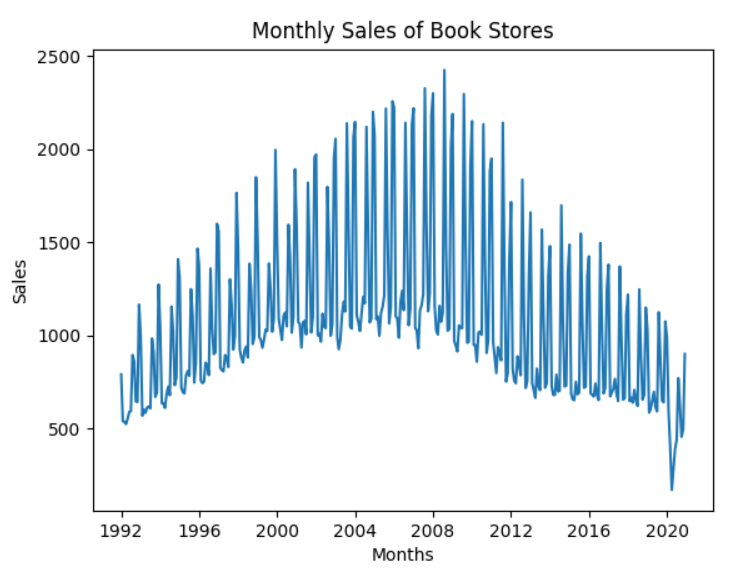

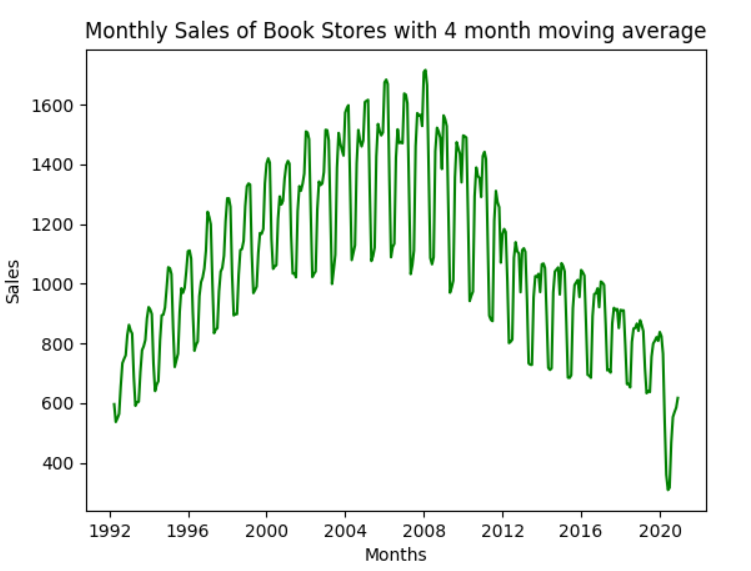

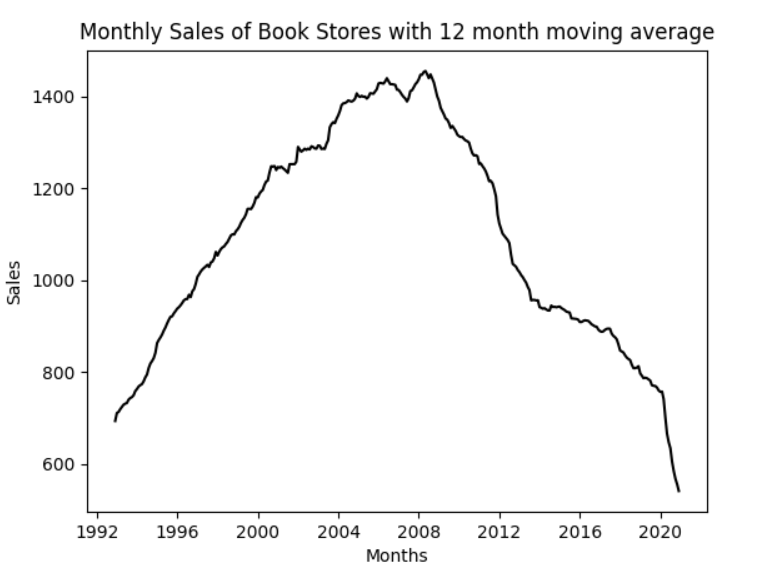

Using 4 month moving average gives much clearer seasonality pattern, using 12 month MA removes seasonality but gives a great trend, much better than just by taking the annual values. But the rise after the ease of restrictions doesn't appear on this graph.

Second kind of business is grocery stores, which will always be actual, as the number of people rises in USA. The value of sales more then doubled in the last 3 decades. Interesting point is the month when the pandemic emerged, people started buying food in advance and sales increased by 20%, but after restrictions were applied sales decreased as people started staying at home more.

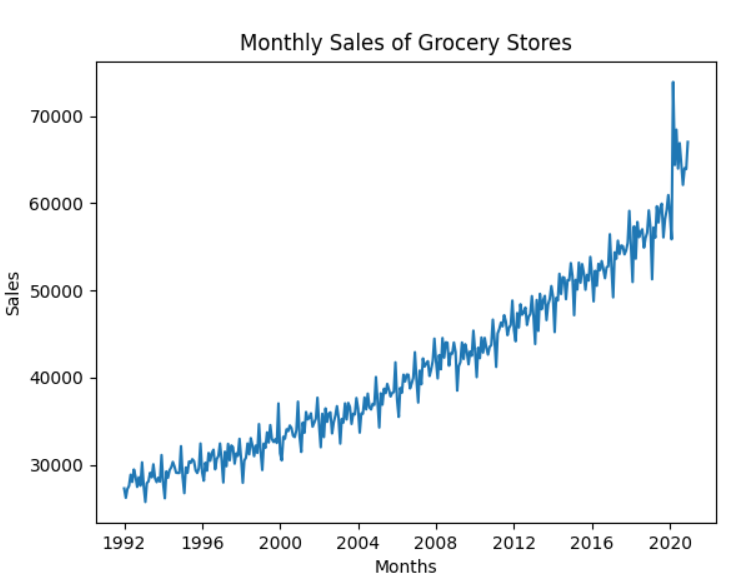

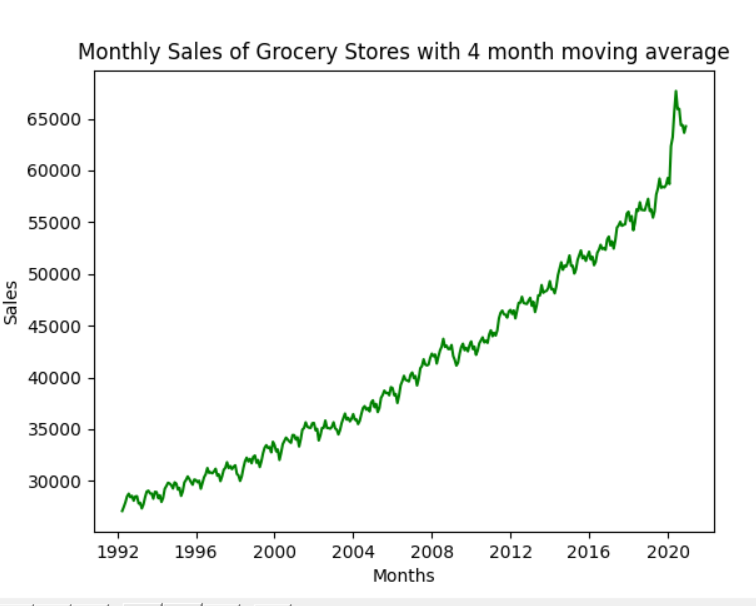

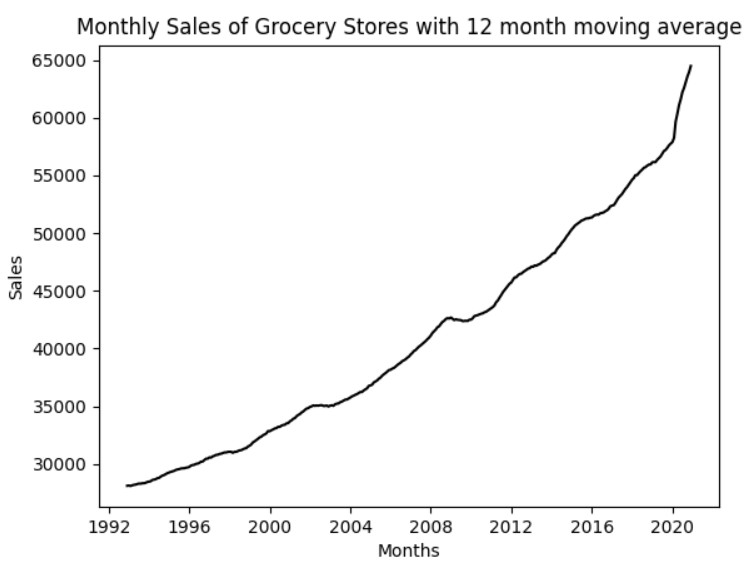

The same case as with previous moving average applications, 4 month MA gives a much clearer sesonality pattern, and 12 month gives clearer uptrend and doesn't show the decrease of sales at the 2nd half of 2020th.

Code for the above graphs:

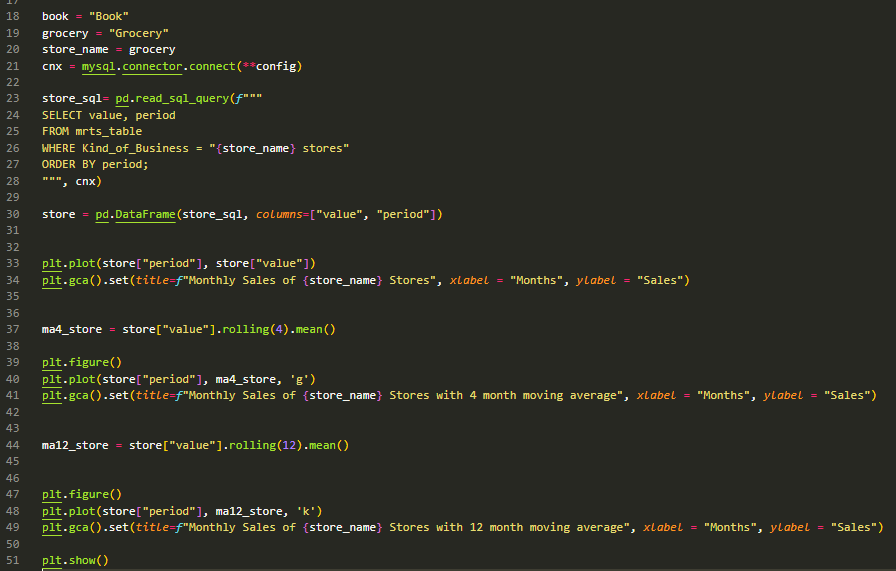

..[Back to top](#Index)

## Conclusion

Unfortunately the least attractive business is book stores, it seems that real books do not attract people as they did in the past, as the sales are the smallest of all the businesses I analyzed, but the e-stores of e-book are not counted so lets hope that it is just because people started reading e-books more than paper ones.

The most attractive business is obviously the grocery store with clear uptrend without any change of a trend, the trend may change only if the population decrease, or if humanity find a way to eat less, or if everyone becomes a vegeterian, which will lead to less spendings, as meet is expensive.

ETL is a powerful tool to perform on a database, with it you get in result a clear database to use for the future analysis. Analysis can give a lot of insights from the data so businesses know better how to adjust their business plans. Trends, percentage changes and rolling time windows, expecially moving averages are poverfull tools to use in analysis, with them predictions of future state of the businesses becomes easier to perform and more helpfull to make the right business plan.

[Back to top](#Index)
## References

- U.S. Census Bureau. “About the Monthly Retail Trade Survey” U.S. Census Bureau. U.S. Census Bureau, September 02, 2022. https://www.census.gov/retail/mrts/about_the_surveys.html .
- Cori, Arnold. “What is an Economic Trend? - Definition & Overview” Study.com . https://study.com/academy/lesson/what-is-an-economic-trend-definition-lesson-quiz.html .
- Kenton, Will. “Percentage Changes and How to Calculate Them” Investopedia. Investopedia, August 31, 2022 https://www.investopedia.com/terms/p/percentage-change.asp#toc-understanding-percentage-change
- Ajet, Luka. “Rolling and Expanding Windows For Dummies”  . Robot Wealth, May 25, 2020 https://robotwealth.com/rolling-and-expanding-windows-for-dummies/ .
